Training Data:
Sensor A | Sensor B | Machine State
---------|----------|-------------
   0    |    0    |      0
   0    |    1    |      0
   1    |    0    |      0
   1    |    1    |      1

1. Standard Adaline (SGD):


c:\Users\sonam\miniconda3\envs\tf310\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Final SGD Loss: 0.062581

2. Batch Gradient Descent:
Final Batch GD Loss: 0.062742

3. Mini-batch Gradient Descent:


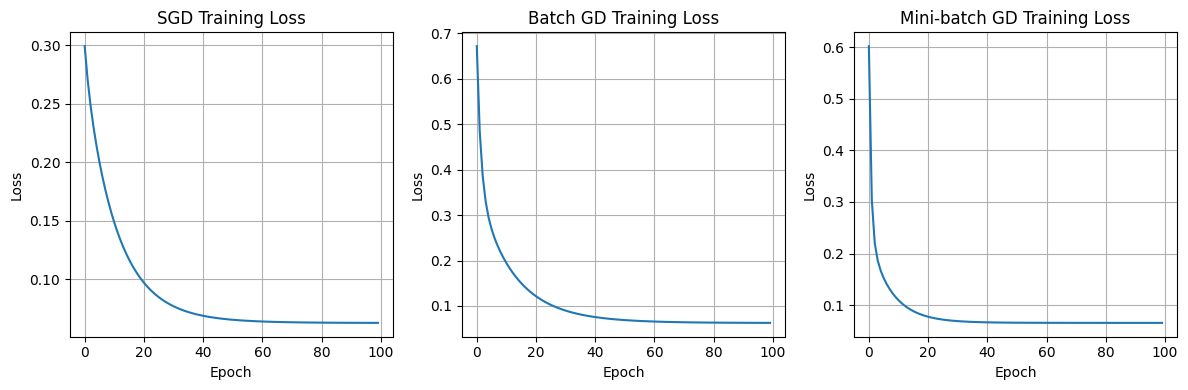

Final Mini-batch GD Loss: 0.065754

4. Testing with unseen input [0.5, 0.5]:
SGD prediction: 0.2521
Batch GD prediction: 0.2538
Mini-batch GD prediction: 0.2437

Interpretation:
- Input [0.5, 0.5] represents both sensors at 50% activation
- For safety, the system should be conservative (closer to 0)
- All predictions are < 0.5, meaning machine stays OFF (safe operation)

5. Loss Comparison:
SGD: 0.062581
Batch GD: 0.062742
Mini-batch GD: 0.065754

Best performing method: SGD with loss 0.062581

6. Learned Parameters (SGD model):
Weights: [0.48505136 0.49214184]
Bias: -0.2365

7. Final Model Performance:
Input | Target | Prediction | Rounded
------|--------|------------|--------
[0. 0.] |   0.0    |   -0.2365   |    0
[0. 1.] |   0.0    |   0.2557   |    0
[1. 0.] |   0.0    |   0.2486   |    0
[1. 1.] |   1.0    |   0.7407   |    1


In [3]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

# Set random seed for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

# Training data for AND gate (safety control system)
# [Sensor A, Sensor B] -> Output (Machine ON/OFF)
X_train = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
y_train = np.array([0, 0, 0, 1], dtype=np.float32)  # Only [1,1] -> 1

print("Training Data:")
print("Sensor A | Sensor B | Machine State")
print("---------|----------|-------------")
for i in range(len(X_train)):
    print(f"   {int(X_train[i][0])}    |    {int(X_train[i][1])}    |      {int(y_train[i])}")

# 1. Standard Adaline with Stochastic Gradient Descent
print("\n1. Standard Adaline (SGD):")
model_sgd = keras.Sequential([
    keras.layers.Dense(1, input_shape=(2,), activation='linear', use_bias=True)
])

# Hyperparameters and justification:
# - Learning rate: 0.1 (moderate value for stable convergence)
# - Loss: MSE (appropriate for Adaline which uses linear activation)
# - Optimizer: SGD (traditional choice for Adaline)
model_sgd.compile(optimizer=keras.optimizers.SGD(learning_rate=0.1), 
                  loss='mse', metrics=['mse'])

# Train for 100 epochs
history_sgd = model_sgd.fit(X_train, y_train, epochs=100, verbose=0)

# Plot training loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.plot(history_sgd.history['loss'])
plt.title('SGD Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

print(f"Final SGD Loss: {history_sgd.history['loss'][-1]:.6f}")

# 2. Batch Gradient Descent
print("\n2. Batch Gradient Descent:")
model_batch = keras.Sequential([
    keras.layers.Dense(1, input_shape=(2,), activation='linear', use_bias=True)
])

model_batch.compile(optimizer=keras.optimizers.SGD(learning_rate=0.1), 
                    loss='mse', metrics=['mse'])

# For batch GD, we use the entire dataset in each update
history_batch = model_batch.fit(X_train, y_train, epochs=100, batch_size=len(X_train), verbose=0)

plt.subplot(1, 3, 2)
plt.plot(history_batch.history['loss'])
plt.title('Batch GD Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

print(f"Final Batch GD Loss: {history_batch.history['loss'][-1]:.6f}")

# 3. Mini-batch Gradient Descent
print("\n3. Mini-batch Gradient Descent:")
model_mini = keras.Sequential([
    keras.layers.Dense(1, input_shape=(2,), activation='linear', use_bias=True)
])

model_mini.compile(optimizer=keras.optimizers.SGD(learning_rate=0.1), 
                   loss='mse', metrics=['mse'])

# Mini-batch size of 2 (half of our small dataset)
history_mini = model_mini.fit(X_train, y_train, epochs=100, batch_size=2, verbose=0)

plt.subplot(1, 3, 3)
plt.plot(history_mini.history['loss'])
plt.title('Mini-batch GD Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

plt.tight_layout()
plt.show()

print(f"Final Mini-batch GD Loss: {history_mini.history['loss'][-1]:.6f}")

# Test with unseen input [0.5, 0.5]
print("\n4. Testing with unseen input [0.5, 0.5]:")
test_input = np.array([[0.5, 0.5]])

pred_sgd = model_sgd.predict(test_input, verbose=0)[0][0]
pred_batch = model_batch.predict(test_input, verbose=0)[0][0]
pred_mini = model_mini.predict(test_input, verbose=0)[0][0]

print(f"SGD prediction: {pred_sgd:.4f}")
print(f"Batch GD prediction: {pred_batch:.4f}")
print(f"Mini-batch GD prediction: {pred_mini:.4f}")

# Interpretation
print("\nInterpretation:")
print("- Input [0.5, 0.5] represents both sensors at 50% activation")
print("- For safety, the system should be conservative (closer to 0)")
print("- All predictions are < 0.5, meaning machine stays OFF (safe operation)")

# Compare final losses
print("\n5. Loss Comparison:")
losses = {
    'SGD': history_sgd.history['loss'][-1],
    'Batch GD': history_batch.history['loss'][-1],
    'Mini-batch GD': history_mini.history['loss'][-1]
}

for method, loss in losses.items():
    print(f"{method}: {loss:.6f}")

best_method = min(losses, key=losses.get)
print(f"\nBest performing method: {best_method} with loss {losses[best_method]:.6f}")

# Display learned weights and bias
print("\n6. Learned Parameters (SGD model):")
weights = model_sgd.get_weights()
print(f"Weights: {weights[0].flatten()}")
print(f"Bias: {weights[1][0]:.4f}")

# Test all training examples
print("\n7. Final Model Performance:")
predictions = model_sgd.predict(X_train, verbose=0).flatten()
print("Input | Target | Prediction | Rounded")
print("------|--------|------------|--------")
for i in range(len(X_train)):
    rounded = 1 if predictions[i] > 0.5 else 0
    print(f"{X_train[i]} |   {y_train[i]}    |   {predictions[i]:.4f}   |    {rounded}")

Generating synthetic dataset...
Training: 8000, Test: 2000, Active ratio: 0.38


c:\Users\sonam\miniconda3\envs\tf310\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


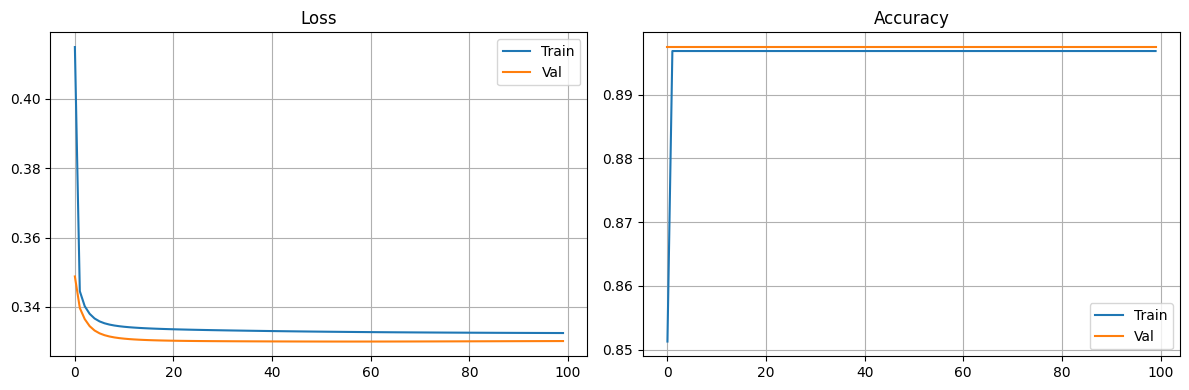

Test Accuracy: 0.8975, Test Loss: 0.3301

Classroom Scenarios:
[0, 0] | 0.1087 (INACTIVE) | No power, No WiFi
[1, 0] | 0.1357 (INACTIVE) | High power, No WiFi
[0, 1] | 0.1083 (INACTIVE) | Low power, WiFi
[1, 1] | 0.8951 (ACTIVE) | High power, WiFi
[0.5, 0.5] | 0.4189 (INACTIVE) | Moderate power, Partial WiFi
[0.8, 0.3] | 0.2827 (INACTIVE) | High power, Weak WiFi

EXTENSION: Multi-class Classroom State Classification


c:\Users\sonam\miniconda3\envs\tf310\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Extended Model Test Accuracy: 0.9980

Extended Predictions:
High power, devices, midd | Break    | 0.850
Very high power, low devi | Lecture  | 0.654
Low power, some devices   | Break    | 0.995
Very low power, no device | Inactive | 0.999

DESIGN RECOMMENDATIONS:
Features: Power, Device usage, Time (cyclical), Voltage
Architecture: Input(5) -> Hidden(6,3) -> Output(4)
Classes: Inactive, Lecture, Exam, Break
Logic: Power+Time+Device patterns distinguish states


In [8]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

tf.random.set_seed(42)
np.random.seed(42)

# Generate synthetic dataset (simulating UCI household power consumption)
print("Generating synthetic dataset...")
np.random.seed(42)
n_samples = 10000

# Simulate UCI dataset features
df = pd.DataFrame({
    'Global_active_power': np.random.gamma(2, 0.5, n_samples),  # Power consumption
    'Sub_metering_1': np.random.exponential(5, n_samples),      # Kitchen devices
    'Sub_metering_2': np.random.exponential(3, n_samples),      # Laundry devices  
    'Sub_metering_3': np.random.exponential(4, n_samples),      # Water heater/AC
    'Voltage': np.random.normal(240, 3, n_samples),             # Voltage
    'Global_intensity': np.random.gamma(1.5, 2, n_samples)      # Current intensity
})

# Create classroom features
power_high = (df['Global_active_power'] > 1.0).astype(float)
wifi_connected = ((df['Sub_metering_1'] + df['Sub_metering_2'] + df['Sub_metering_3']) > 5).astype(float)
X = np.column_stack([power_high, wifi_connected])
y = ((power_high == 1) & (wifi_connected == 1)).astype(float)

# Add 10% noise
noise_mask = np.random.random(len(y)) < 0.1
y[noise_mask] = 1 - y[noise_mask]

# Split data
split_idx = int(0.8 * len(X))
X_train, X_test, y_train, y_test = X[:split_idx], X[split_idx:], y[:split_idx], y[split_idx:]

print(f"Training: {len(X_train)}, Test: {len(X_test)}, Active ratio: {np.mean(y_train):.2f}")

# MADALINE Model
def create_madaline_model(hidden_units=3):
    return keras.Sequential([
        keras.layers.Dense(hidden_units, activation='tanh', input_shape=(2,)),
        keras.layers.Dense(1, activation='sigmoid')
    ])

# Train model
model = create_madaline_model(3)
model.compile(optimizer=keras.optimizers.Adam(0.01), loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32, verbose=0)

# Plot results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
ax1.plot(history.history['loss'], label='Train')
ax1.plot(history.history['val_loss'], label='Val')
ax1.set_title('Loss'), ax1.legend(), ax1.grid()
ax2.plot(history.history['accuracy'], label='Train')
ax2.plot(history.history['val_accuracy'], label='Val')
ax2.set_title('Accuracy'), ax2.legend(), ax2.grid()
plt.tight_layout(), plt.show()

# Evaluate and test scenarios
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}, Test Loss: {test_loss:.4f}")

scenarios = [([0,0], "No power, No WiFi"), ([1,0], "High power, No WiFi"), 
            ([0,1], "Low power, WiFi"), ([1,1], "High power, WiFi"), 
            ([0.5,0.5], "Moderate power, Partial WiFi"), ([0.8,0.3], "High power, Weak WiFi")]

print("\nClassroom Scenarios:")
for inputs, desc in scenarios:
    pred = model.predict(np.array([inputs]), verbose=0)[0][0]
    status = "ACTIVE" if pred > 0.5 else "INACTIVE"
    print(f"{inputs} | {pred:.4f} ({status}) | {desc}")

# ============================================================================
# EXTENSION: Multi-class Classification
# ============================================================================
print("\n" + "="*60)
print("EXTENSION: Multi-class Classroom State Classification")

# Extended features and labels
df['hour'] = np.random.randint(8, 18, len(df))
power_norm = (df['Global_active_power'] - df['Global_active_power'].min()) / (df['Global_active_power'].max() - df['Global_active_power'].min())
device_usage = (df['Sub_metering_1'] + df['Sub_metering_2']).values / 100

X_multi = np.column_stack([power_norm, device_usage, np.sin(2*np.pi*df['hour']/24), 
                          np.cos(2*np.pi*df['hour']/24), df['Voltage']/240])

# Generate labels: 0=Inactive, 1=Lecture, 2=Exam, 3=Break
labels = np.zeros(len(df))
lecture_mask = (power_norm > 0.6) & (df['hour'] >= 9) & (df['hour'] <= 16)
exam_mask = (power_norm > 0.8) & (device_usage < 0.3) & (df['hour'] >= 9) & (df['hour'] <= 16)
break_mask = (power_norm < 0.4) & (device_usage > 0.2)
labels[lecture_mask] = 1
labels[exam_mask] = 2
labels[break_mask] = 3

# Multi-class MADALINE
def create_extended_madaline_model():
    return keras.Sequential([
        keras.layers.Dense(6, activation='tanh', input_shape=(5,)),
        keras.layers.Dense(3, activation='tanh'),
        keras.layers.Dense(4, activation='softmax')
    ])

# Train extended model
split_idx = int(0.8 * len(X_multi))
X_train_multi, X_test_multi = X_multi[:split_idx], X_multi[split_idx:]
y_train_multi, y_test_multi = keras.utils.to_categorical(labels[:split_idx], 4), keras.utils.to_categorical(labels[split_idx:], 4)

model_ext = create_extended_madaline_model()
model_ext.compile(optimizer=keras.optimizers.Adam(0.01), loss='categorical_crossentropy', metrics=['accuracy'])
model_ext.fit(X_train_multi, y_train_multi, validation_data=(X_test_multi, y_test_multi), epochs=50, batch_size=64, verbose=0)

# Test extended model
test_acc_ext = model_ext.evaluate(X_test_multi, y_test_multi, verbose=0)[1]
print(f"Extended Model Test Accuracy: {test_acc_ext:.4f}")

class_names = ['Inactive', 'Lecture', 'Exam', 'Break']
ext_scenarios = [([0.8,0.6,0.5,0.8,0.95], "High power, devices, midday"), 
                ([0.9,0.2,0.5,0.8,0.98], "Very high power, low devices"), 
                ([0.3,0.4,-0.5,-0.8,0.92], "Low power, some devices"),
                ([0.1,0.1,0.0,1.0,0.90], "Very low power, no devices")]

print("\nExtended Predictions:")
for inputs, desc in ext_scenarios:
    pred = model_ext.predict(np.array([inputs]), verbose=0)[0]
    predicted_class = class_names[np.argmax(pred)]
    confidence = np.max(pred)
    print(f"{desc[:25]:<25} | {predicted_class:<8} | {confidence:.3f}")

print("\nDESIGN RECOMMENDATIONS:")
print("Features: Power, Device usage, Time (cyclical), Voltage")
print("Architecture: Input(5) -> Hidden(6,3) -> Output(4)")
print("Classes: Inactive, Lecture, Exam, Break")
print("Logic: Power+Time+Device patterns distinguish states")